In [1]:
import os

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Get the current working directory and create a path for a new directory named "01_Data".
data_Dir = os.getcwd() + '/01_Data'

# Create a directory for data, and use exist_ok=True to avoid errors if it already exists.
os.makedirs(data_Dir, exist_ok=True)

# Get the current working directory and create a path for a new directory named "02_Analysis".
analysis_Dir = os.getcwd() + '/02_Analysis'

# Create a directory for analysis, and use exist_ok=True to avoid errors if it already exists.
os.makedirs(analysis_Dir, exist_ok=True)

# Create a path for a new directory named "Tutorial_01_outputs".
output_Dir = analysis_Dir + '/Tutorial_01_outputs'

# Create a directory for outputs, and use exist_ok=True to avoid errors if it already exists.
os.makedirs(output_Dir, exist_ok=True)

In [3]:
# this path determines where downloaded data will be stored
manifest_path = os.path.join(data_Dir+'/', 'manifest.json')

cache = EcephysProjectCache.from_warehouse(manifest=manifest_path, timeout=50*60)

print(cache.get_all_session_types())

['brain_observatory_1.1', 'functional_connectivity']


In [4]:
# load session information
sessions = cache.get_session_table()
brain_observatory_type_sessions = sessions[sessions["session_type"] == "brain_observatory_1.1"]
display(brain_observatory_type_sessions)

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"
739448407,2019-10-03T00:00:00Z,716813543,brain_observatory_1.1,112.0,M,wt/wt,625,2221,6,"[grey, VISam, nan, VIS, VISp, VISl, VISrl]"
742951821,2019-10-03T00:00:00Z,723627604,brain_observatory_1.1,120.0,M,wt/wt,893,2219,6,"[VISal, nan, grey, VISl, VISrl, VISp, VISpm, VIS]"
743475441,2019-10-03T00:00:00Z,722882755,brain_observatory_1.1,121.0,M,wt/wt,553,2225,6,"[LP, LGd, HPF, DG, CA3, CA1, VISrl, nan, PP, P..."
744228101,2019-10-03T00:00:00Z,719817805,brain_observatory_1.1,122.0,M,wt/wt,659,2226,6,"[Eth, TH, LP, POL, APN, DG, CA1, VIS, nan, CA3..."


In [5]:
# download dataset of a specific session
session_id = 791319847
session_dir = data_Dir+'/session_'+str(session_id)
session = cache.get_session_data(session_id) 
sessions.loc[session_id]

Downloading:   0%|          | 0.00/2.32G [00:00<?, ?B/s]

published_at                                               2019-10-03T00:00:00Z
specimen_id                                                           769360779
session_type                                              brain_observatory_1.1
age_in_days                                                               116.0
sex                                                                           M
full_genotype                     Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt
unit_count                                                                  555
channel_count                                                              2229
probe_count                                                                   6
ecephys_structure_acronyms    [APN, DG, CA1, VISam, nan, LP, TH, VISpm, POL,...
Name: 791319847, dtype: object

In [6]:
session.structurewise_unit_counts

VISp     93
CA1      85
VISrl    58
VISl     56
VISam    49
VISal    43
SUB      41
CA3      33
DG       32
VISpm    17
LGv      16
LP        9
LGd       8
TH        4
ZI        4
CA2       3
POL       3
ProS      1
Name: ecephys_structure_acronym, dtype: int64

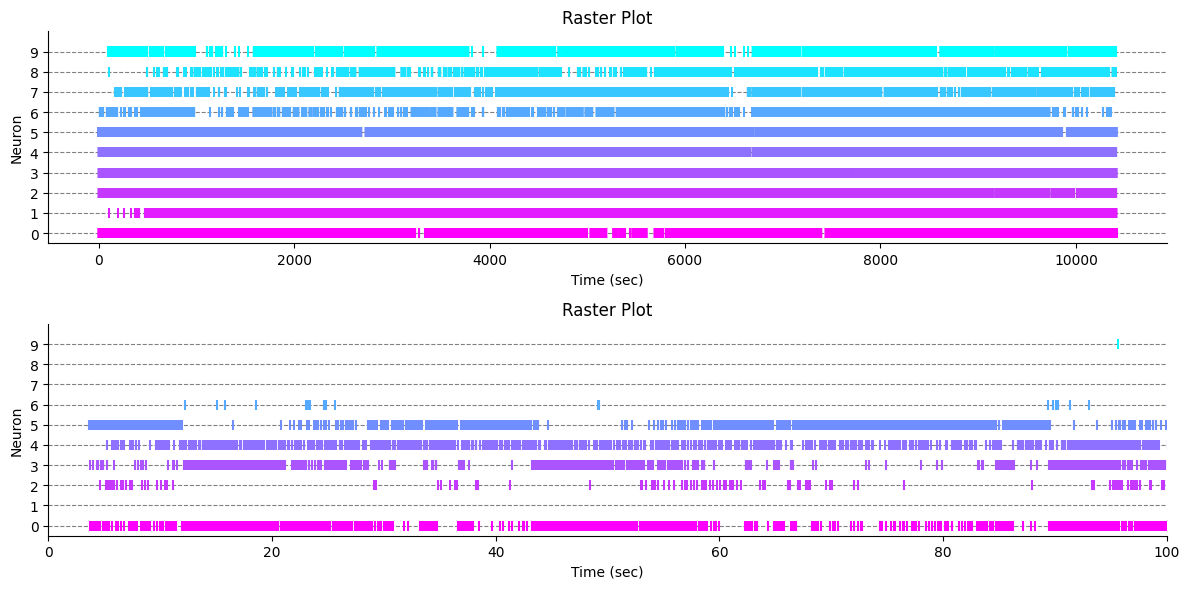

In [7]:
# Extract VISp neurons spike timing and plot as a raster plot
region = 'VISp'
units = session.units[session.units["ecephys_structure_acronym"] == region]
# display(units)

# Extract spike timing
spike_times = []
for unit_id in units.index:
    spike_times.append(session.spike_times[unit_id])

# plot
num_plot_neurons = 10
color_idx = np.linspace(1, 0, num_plot_neurons)

# Create a raster plot
plt.figure(figsize=(12, 6), tight_layout=True)
plt.subplot(211)
plt.eventplot(spike_times[0:num_plot_neurons], linelengths=0.5, color=plt.cm.cool(color_idx))

# Set axis labels and spines
plt.xlabel('Time (sec)')
plt.ylabel('Neuron')
plt.title('Raster Plot')
sns.despine()

# Set y-axis tick positions according to the number of neurons
plt.yticks(np.arange(0, num_plot_neurons))
plt.ylim(-0.5, num_plot_neurons)

# Display grid lines
plt.grid(True, axis='y', linestyle='--', color='gray')

plt.subplot(212)
plt.eventplot(spike_times[0:num_plot_neurons], linelengths=0.5, color=plt.cm.cool(color_idx))

# Set x-axis limitation
plt.xlim(0, 100)

# Set axis labels and spines
plt.xlabel('Time (sec)')
plt.ylabel('Neuron')
plt.title('Raster Plot')
sns.despine()

# Set y-axis tick positions according to the number of neurons
plt.yticks(np.arange(0, num_plot_neurons))
plt.ylim(-0.5, num_plot_neurons)

# Display grid lines
plt.grid(True, axis='y', linestyle='--', color='gray')

# Save
plt.savefig(output_Dir+'/Spike-train.png')

In [12]:
def sptimes2binraster(session, region, time_window, binwidth, session_dir):
    '''
        This function returns binned spike train
        Parameters
        ----------
        session: session metainfo
        region: region of intereset i.e. VISp, CA1
        time_window: time window for binning (s)
        binwidth: binwidth (s)
        session_dir: session directory
    ''' 
    import pickle
    import os
    import numpy as np

    out_dir = session_dir + '/binraster'
    os.makedirs(out_dir, exist_ok=True)
    f_name = out_dir + '/binraster_' + region + '_' + str(binwidth) + 'sec_' + str(time_window[0]) + '-' + str(time_window[1]) + '.pkl'
    time = np.arange(time_window[0], time_window[1], binwidth)

    if not os.path.exists(f_name):
        units = session.units[session.units["ecephys_structure_acronym"] == region]
        binRaster = []

        # Prepare bin edges for histogramming
        bin_edges = np.arange(time_window[0], time_window[1] + binwidth, binwidth)

        for unit_id in units.index:
            # Extract spike times for the current unit
            spike_times = session.spike_times[unit_id]
            # Use np.histogram to bin spike times efficiently
            bin_counts, _ = np.histogram(spike_times, bins=bin_edges)
            binRaster.append(bin_counts)

        binRaster = np.array(binRaster)

        with open(f_name, 'wb') as f:
            pickle.dump(binRaster, f)
    else:
        with open(f_name, 'rb') as f:
            binRaster = pickle.load(f)

    return time, binRaster

In [14]:
%%time
# Binning the spike trains
time_window = [0,10409]
binwidth=0.025
time, binraster_VISp = sptimes2binraster(session=session, region='VISp', time_window=time_window, binwidth=binwidth, session_dir=session_dir)

CPU times: user 1.85 s, sys: 0 ns, total: 1.85 s
Wall time: 1.85 s


In [15]:
# %%time
## For all regions
# time_window = [0,10409]
# binwidth=0.025
# binraster_all={}
# for region in session.structurewise_unit_counts.keys():
#     time, binraster=sptimes2binraster(session=session, region=region, time_window=time_window, binwidth=binwidth, session_dir=session_dir)
#     binraster_all.update({region: binraster})

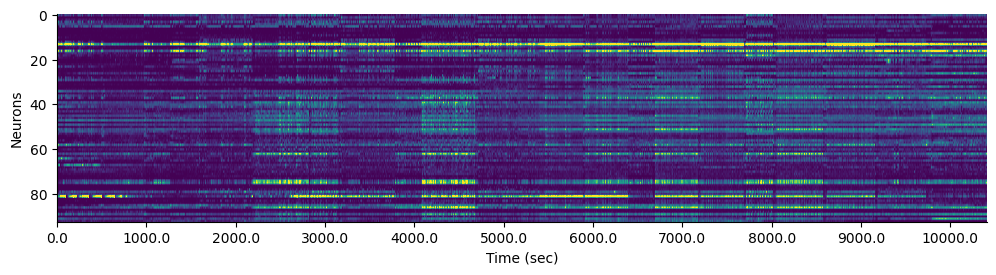

In [16]:
plt.figure(figsize=(12,4))
plt.imshow(binraster_VISp, aspect=1000, vmin=0, vmax=1, cmap='viridis')
plt.xticks(np.arange(0,binraster_VISp.shape[1], 1000/binwidth), np.arange(0,binraster_VISp.shape[1]*binwidth, 1000));
plt.xlabel('Time (sec)')
plt.ylabel('Neurons')
sns.despine()

In [17]:
session.stimulus_presentations[session.stimulus_presentations['stimulus_name']=='flashes']

,stimulus_block,start_time,stop_time,y_position,orientation,contrast,stimulus_name,frame,size,color,phase,spatial_frequency,temporal_frequency,x_position,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,,,,,
3647,1.0,1290.218202,1290.468414,null,0.0,0.8,flashes,null,"[300.0, 300.0]",1.0,"[0.0, 0.0]","[0.0, 0.0]",null,null,0.250211,244
3648,1.0,1292.219872,1292.470086,null,0.0,0.8,flashes,null,"[300.0, 300.0]",-1.0,"[0.0, 0.0]","[0.0, 0.0]",null,null,0.250214,245
3649,1.0,1294.221592,1294.471791,null,0.0,0.8,flashes,null,"[300.0, 300.0]",1.0,"[0.0, 0.0]","[0.0, 0.0]",null,null,0.250199,244
3650,1.0,1296.223242,1296.473451,null,0.0,0.8,flashes,null,"[300.0, 300.0]",1.0,"[0.0, 0.0]","[0.0, 0.0]",null,null,0.250209,244
3651,1.0,1298.224902,1298.475111,null,0.0,0.8,flashes,null,"[300.0, 300.0]",-1.0,"[0.0, 0.0]","[0.0, 0.0]",null,null,0.250209,245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3792,1.0,1580.460772,1580.710984,null,0.0,0.8,flashes,null,"[300.0, 300.0]",-1.0,"[0.0, 0.0]","[0.0, 0.0]",null,null,0.250211,245
3793,1.0,1582.462462,1582.712669,null,0.0,0.8,flashes,null,"[300.0, 300.0]",-1.0,"[0.0, 0.0]","[0.0, 0.0]",null,null,0.250206,245
3794,1.0,1584.464142,1584.714346,null,0.0,0.8,flashes,null,"[300.0, 300.0]",1.0,"[0.0, 0.0]","[0.0, 0.0]",null,null,0.250204,244


In [25]:
stimulus_onset = np.array(session.stimulus_presentations[(session.stimulus_presentations['stimulus_name']=='flashes') 
                                                        & (session.stimulus_presentations['color']==1.0)]['start_time'])-time_window[0]
# stimulus_onset = np.array(session.stimulus_presentations[(session.stimulus_presentations['stimulus_name']=='static_gratings') 
#                                                         & (session.stimulus_presentations['orientation']==0.0)]['start_time'])-time_window[0]
# stimulus_onset = np.array(session.stimulus_presentations[(session.stimulus_presentations['stimulus_name']=='drifting_gratings') 
#                                                         & (session.stimulus_presentations['orientation']==0.0)]['start_time'])-time_window[0]
# stimulus_onset = np.array(session.stimulus_presentations[(session.stimulus_presentations['stimulus_name']=='drifting_gratings') 
#                                                         & (session.stimulus_presentations['orientation']==0.0) 
#                                                         & (session.stimulus_presentations['temporal_frequency']==4)]['start_time'])-time_window[0]

In [26]:
def calc_PSTH(binraster, stimulus_onset, binwidth, peri_stim_window):
    '''
    Calculate the z-scored PSTH (Peri-Stimulus Time Histogram) of each neuron.

    Parameters:
    - binraster: binned raster of spike data (N neurons x time bins).
    - stimulus_onset: Time (in seconds) when the stimulus is presented.
    - binwidth: Width of the time bins for assembly detection.
    - peri_stim_window: Time window for PSTH (in seconds) relative to stimulus onset.

    Returns:
    - time_psth: Time vector for the PSTH.
    - z_binraster_PSTH: Z-scored PSTH for each neuron.
    '''

    # Generate the time vector for the PSTH
    time_psth = np.arange(peri_stim_window[0] / binwidth, (peri_stim_window[1] + binwidth) / binwidth) * binwidth

    # Calculate binned values for stimulus onset and peri-stimulus windows
    binned_stimulus_onset = stimulus_onset / binwidth
    binned_pre_stim_windows = np.round((binned_stimulus_onset + peri_stim_window[0] / binwidth)).astype(int)
    binned_post_stim_windows = np.round((binned_stimulus_onset + peri_stim_window[1] / binwidth)).astype(int)

    # Z-score the binned raster along the time axis
    z_binraster = stats.zscore(binraster, axis=1)

    # Initialize a list to store z-scored PSTH for each neuron
    z_binraster_PSTH = []

    # Calculate PSTH for each neuron
    for k in range(z_binraster.shape[0]):
        z_binraster_PSTH_tmp = []
        for i in range(len(binned_pre_stim_windows)):
            tmp = z_binraster[k][binned_pre_stim_windows[i]:binned_post_stim_windows[i] + 1]
            z_binraster_PSTH_tmp.append(tmp)
        z_binraster_PSTH.append(z_binraster_PSTH_tmp)

    # Convert the list of PSTHs into a NumPy array
    z_binraster_PSTH = np.array(z_binraster_PSTH)

    return time_psth, z_binraster_PSTH


In [27]:
peri_stim_window = [-0.2, 0.5]
time_psth, z_binraster_PSTH_VISp = calc_PSTH(binraster_VISp, stimulus_onset, binwidth, peri_stim_window)

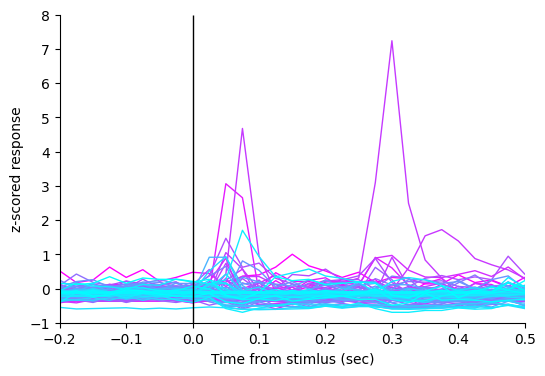

In [28]:
num_plot_neurons = z_binraster_PSTH_VISp.shape[0]
color_idx = np.linspace(1, 0, num_plot_neurons)
plt.figure(figsize=(6,4))
for i in range(num_plot_neurons):
    plt.plot(time_psth, np.mean(z_binraster_PSTH_VISp,axis=1)[i], color=plt.cm.cool(color_idx[i]), lw=1)
plt.vlines(x=0, ymin=-1, ymax=8, color='black', lw=1, zorder=3)
plt.ylim(-1, 8)
plt.xlim(min(time_psth),max(time_psth))
plt.xlabel('Time from stimlus (sec)')
plt.ylabel('z-scored response')
sns.despine()